# Task 1.7 Network Visualizations

In [1]:
# import libraries
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
# import relationship data
df_relationship = pd.read_csv('country_relationship.csv', index_col = 0)

In [5]:
df_relationship

,source,target,value
0,Austria,France,6
1,Austria,Russia,5
2,Germany,Italy,19
3,Austria,Germany,9
4,Germany,Spain,2
...,...,...,...
91,Greece,Italy,3
92,Italy,Japan,6
93,Australia,Philippines,3
94,Romania,Russia,6


In [7]:
# create graph from a pandas dataframe
G = nx.from_pandas_edgelist(df_relationship, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# NetworkX Graph Visualization

In [9]:
import psutil
print(f"Memory used: {psutil.virtual_memory().percent}%")

Memory used: 67.7%


In [ ]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

#### I understand how this works, however my computer doesn't have the RAM to create this visualization. So, in theory this would create a rough outline network visualization but this step will be omitted. (I tried doing it even with only 5 nodes and it still crashed).

In [ ]:
# save the figure
h.savefig('networkx_plt_countries.png')

# Pyvis Graph Visualization

In [11]:
# define net object
net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# define nodes from the G object
node_degree = dict(G.degree)

# setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

countries.html


# Leiden Algorithm Community Detection

In [13]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool', 'infomap', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [16]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [19]:
new_com = coms.to_node_community_map()

In [22]:
new_com

defaultdict(list,
            {'Austria': [0],
             'France': [0],
             'Russia': [0],
             'Germany': [0],
             'Italy': [0],
             'Spain': [0],
             'Netherlands': [0],
             'Luxembourg': [0],
             'Belgium': [0],
             'Denmark': [0],
             'Norway': [0],
             'Sweden': [0],
             'Greece': [0],
             'Algeria': [0],
             'Morocco': [0],
             'Philippines': [1],
             'Australia': [1],
             'United States': [1],
             'Laos': [1],
             'Cambodia': [1],
             'Kenya': [1],
             'Ghana': [1],
             'Seychelles': [1],
             'North Korea': [1],
             'Cuba': [1],
             'South Korea': [1],
             'Canada': [1],
             'Vietnam': [1],
             'Ukraine': [2],
             'Belarus': [2],
             'Libya': [2],
             'Egypt': [2],
             'Iraq': [2],
             'Pakista

In [25]:
# put the output from new_com into a dictionary
dict_com = {k:v[0] for k,v in new_com.items()}

In [28]:
dict_com

{'Austria': 0,
 'France': 0,
 'Russia': 0,
 'Germany': 0,
 'Italy': 0,
 'Spain': 0,
 'Netherlands': 0,
 'Luxembourg': 0,
 'Belgium': 0,
 'Denmark': 0,
 'Norway': 0,
 'Sweden': 0,
 'Greece': 0,
 'Algeria': 0,
 'Morocco': 0,
 'Philippines': 1,
 'Australia': 1,
 'United States': 1,
 'Laos': 1,
 'Cambodia': 1,
 'Kenya': 1,
 'Ghana': 1,
 'Seychelles': 1,
 'North Korea': 1,
 'Cuba': 1,
 'South Korea': 1,
 'Canada': 1,
 'Vietnam': 1,
 'Ukraine': 2,
 'Belarus': 2,
 'Libya': 2,
 'Egypt': 2,
 'Iraq': 2,
 'Pakistan': 2,
 'Israel': 2,
 'South Africa': 2,
 'Iran': 2,
 'Rwanda': 2,
 'Poland': 3,
 'Estonia': 3,
 'Latvia': 3,
 'Lithuania': 3,
 'Finland': 3,
 'Albania': 3,
 'Romania': 3,
 'Bulgaria': 3,
 'Hungary': 3,
 'Japan': 4,
 'China': 4,
 'Thailand': 4,
 'Singapore': 4,
 'Solomon Islands': 4,
 'India': 4,
 'Papua New Guinea': 4,
 'Mongolia': 4}

In [33]:
# rerun network graph with communities as an argument
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_communities_leiden.html")

countries_communities_leiden.html


#### These groupings, in my limited knowledge of 20th century history, don't align with typical groupings based on country interaction. The strongest factor in groupings appears to be geography (particulary the Blue, Yellow, and Red groups). The next strongest factor appears to be interaction, particualry with the US and the Green group while the Purple group appears to be geographical and conflict related. 

# Influencial Countries in the 20th Century

In [38]:
# degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Austria': 0.05555555555555555,
 'France': 0.18518518518518517,
 'Russia': 0.12962962962962962,
 'Germany': 0.2222222222222222,
 'Italy': 0.1111111111111111,
 'Spain': 0.018518518518518517,
 'Poland': 0.12962962962962962,
 'Estonia': 0.05555555555555555,
 'Latvia': 0.037037037037037035,
 'Lithuania': 0.05555555555555555,
 'Finland': 0.05555555555555555,
 'Netherlands': 0.05555555555555555,
 'Luxembourg': 0.037037037037037035,
 'Belgium': 0.037037037037037035,
 'Denmark': 0.05555555555555555,
 'Norway': 0.018518518518518517,
 'Sweden': 0.037037037037037035,
 'Greece': 0.07407407407407407,
 'Albania': 0.05555555555555555,
 'Ukraine': 0.037037037037037035,
 'Belarus': 0.037037037037037035,
 'Libya': 0.07407407407407407,
 'Egypt': 0.037037037037037035,
 'Iraq': 0.037037037037037035,
 'Japan': 0.2222222222222222,
 'Algeria': 0.037037037037037035,
 'Morocco': 0.018518518518518517,
 'China': 0.09259259259259259,
 'Thailand': 0.037037037037037035,
 'Singapore': 0.05555555555555555,
 'Philippi

In [41]:
df_degree = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [46]:
df_degree.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [49]:
df_degree

,countries,centrality
3,Germany,0.222222
24,Japan,0.222222
34,United States,0.203704
1,France,0.185185
2,Russia,0.129630
6,Poland,0.129630
4,Italy,0.111111
27,China,0.092593
31,Australia,0.092593
45,Romania,0.092593


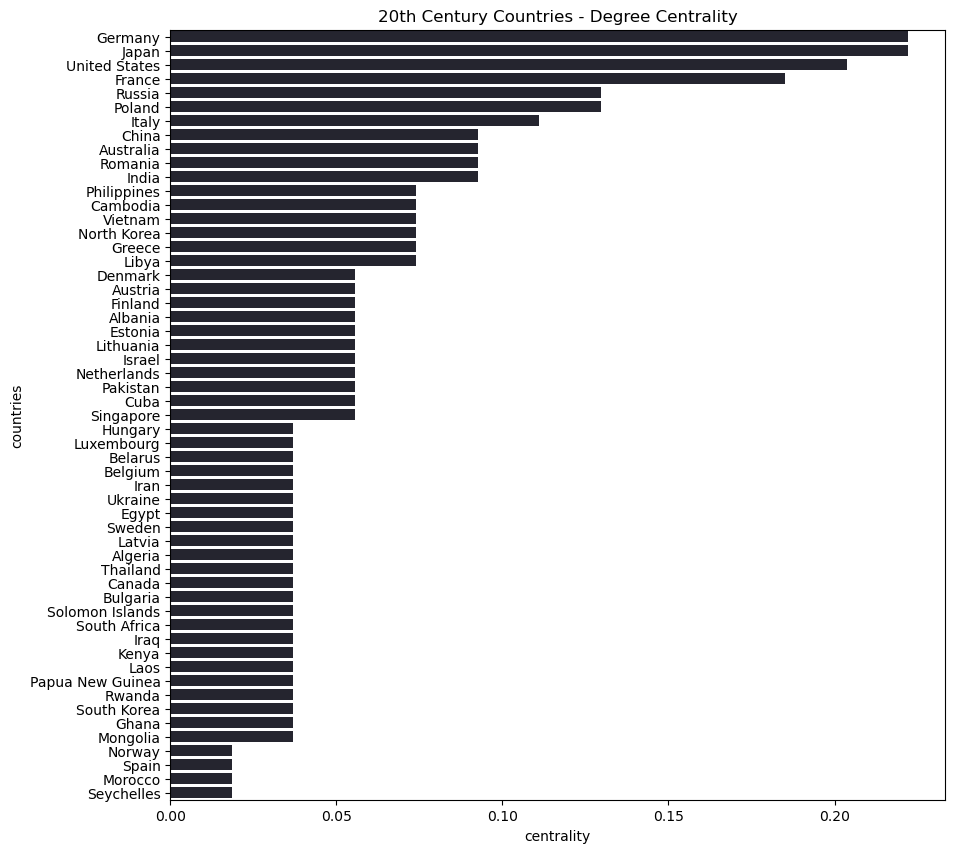

In [62]:
# plot the degree centrality
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = df_degree).set_title("20th Century Countries - Degree Centrality")

In [65]:
# closeness centrality
closeness_dict = nx.closeness_centrality(G)
df_closeness = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [68]:
df_closeness.sort_values(by = ['centrality'], ascending=False, inplace = True)

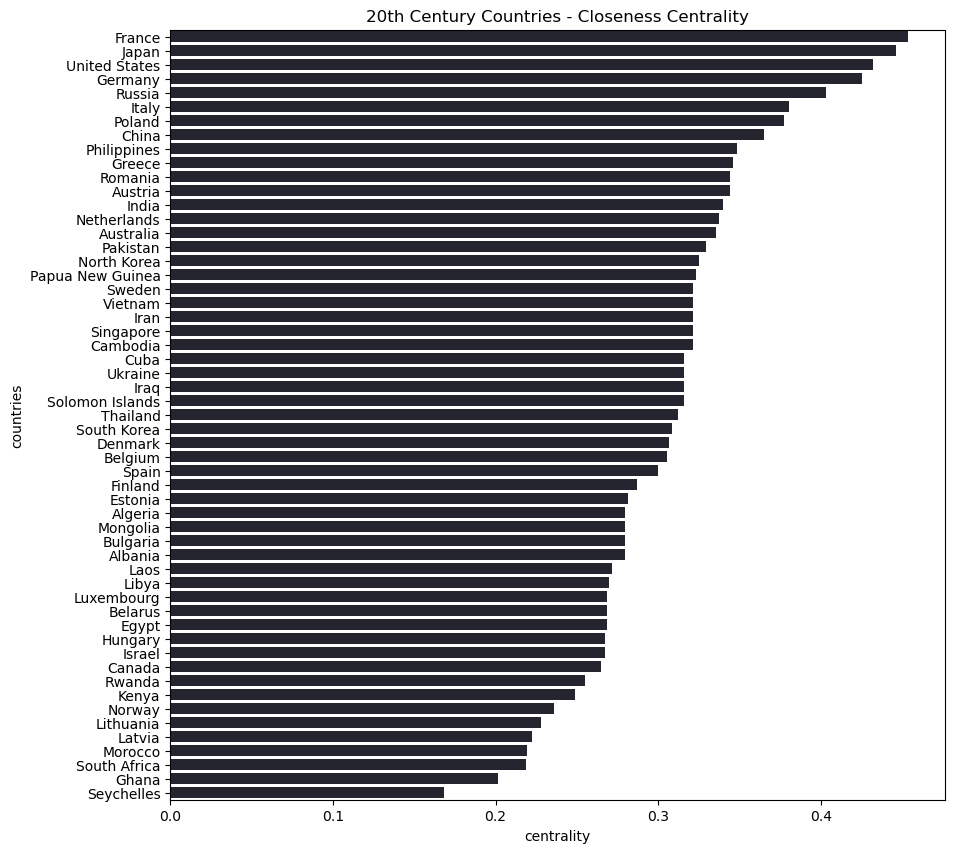

In [73]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = df_closeness).set_title("20th Century Countries - Closeness Centrality")

In [76]:
# betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
df_betweennes = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [79]:
df_betweennes.sort_values(by = ['centrality'], ascending=False, inplace = True)

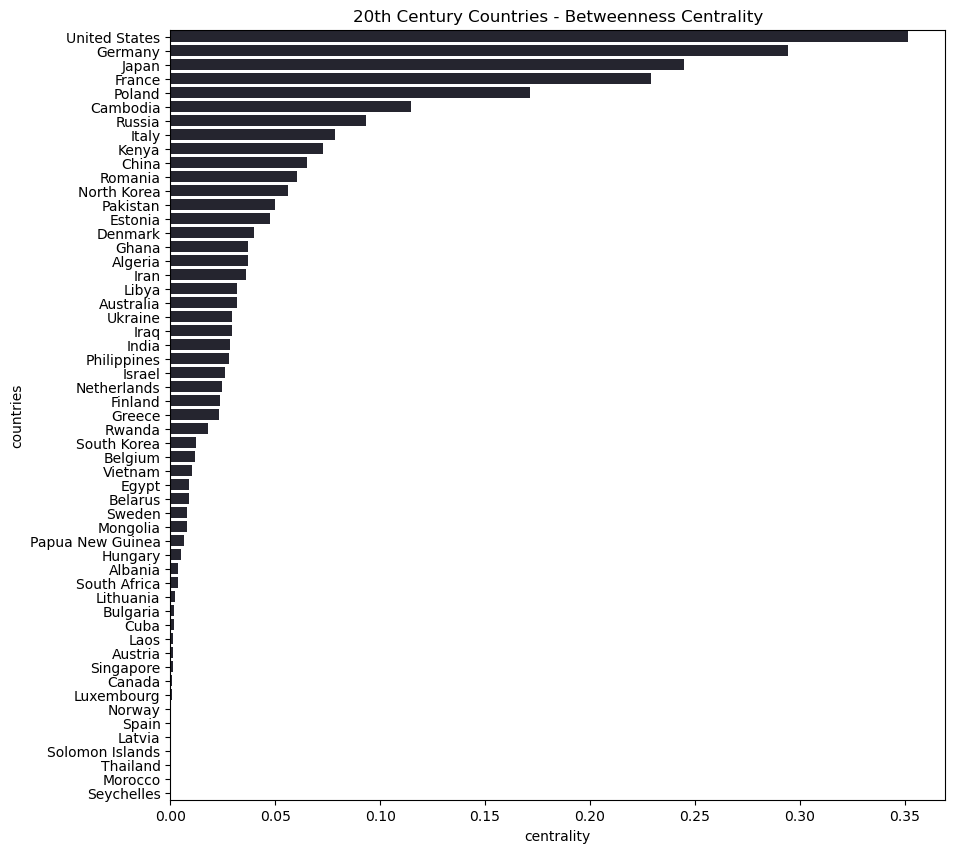

In [86]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = df_betweennes).set_title("20th Century Countries - Betweenness Centrality")

#### Due to the intense international conflicts, particularly WWI and WWII, during the 20th century these centrality measures make sense. Germany, Japan, and the United States consistently top the lists and they were crucial players in these conflicts. On the opposite end, countries with peace or internal conflicts during this time are towards the bottom of the list as it led to limited interactions with other countries at the time.

In [89]:
# save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [91]:
# view all nodes with their attributes
G.nodes(data=True)  

NodeDataView({'Austria': {'size': 3, 'group': 0, 'degree_centrality': 0.05555555555555555, 'betweenness_centrality': 0.0012811553692056836, 'closeness_centrality': 0.34394904458598724}, 'France': {'size': 10, 'group': 0, 'degree_centrality': 0.18518518518518517, 'betweenness_centrality': 0.22923703170034407, 'closeness_centrality': 0.453781512605042}, 'Russia': {'size': 7, 'group': 0, 'degree_centrality': 0.12962962962962962, 'betweenness_centrality': 0.09343688961089383, 'closeness_centrality': 0.40298507462686567}, 'Germany': {'size': 12, 'group': 0, 'degree_centrality': 0.2222222222222222, 'betweenness_centrality': 0.29427814013767895, 'closeness_centrality': 0.4251968503937008}, 'Italy': {'size': 6, 'group': 0, 'degree_centrality': 0.1111111111111111, 'betweenness_centrality': 0.0784530691763396, 'closeness_centrality': 0.38028169014084506}, 'Spain': {'size': 1, 'group': 0, 'degree_centrality': 0.018518518518518517, 'betweenness_centrality': 0.0, 'closeness_centrality': 0.3}, 'Pola

# Key Observation:
One very important thing to note after this lesson is the margin of error. The data was scraped from a Wikipedia webpage (potentially reliable) and compared to a potentially incomplete list of countries. While this might give a decent overview of interactions there is certainly a significant amount of refinement that should go into this data before it's used in any scholarly or professional setting. 

#### Link to GitHub: